In [241]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv',encoding='ISO-8859-1')

In [242]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [243]:
star_wars['RespondentID'].head()
star_wars.shape


(1187, 38)

In [244]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape


(1186, 38)

In [245]:
yes_no = {
    'Yes':True,
    'No':False,
}

cols = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']
star_wars[cols].head()


,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,Yes,Yes
2,No,NaN
3,Yes,No
4,Yes,Yes
5,Yes,Yes


In [246]:
for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()
star_wars[cols].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


In [247]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [248]:
cols = star_wars.columns[3:9]
star_wars[cols].head()
star_wars[cols[5]].unique()

array(['Star Wars: Episode VI Return of the Jedi', nan], dtype=object)

In [249]:
import numpy as np
star_war_dict = {
    'Star Wars: Episode I  The Phantom Menace':True,
    'Star Wars: Episode II  Attack of the Clones':True,
    'Star Wars: Episode IV  A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True,
    'Star Wars: Episode III  Revenge of the Sith':True,
     np.NaN:False,
}

In [250]:
for col in cols:
    star_wars[col] = star_wars[col].map(star_war_dict)

In [251]:
star_wars[cols].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [252]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'    
})

In [253]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [254]:
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [255]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [256]:
star_wars[star_wars.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [257]:
star_wars[star_wars.columns[9:15]].columns

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [258]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
       'Unnamed: 10' : 'ranking_2', 'Unnamed: 11': 'ranking_3', 'Unnamed: 12': 'ranking_4', 'Unnamed: 13': 'ranking_5',
       'Unnamed: 14': 'ranking_6'
})

In [259]:
star_wars[star_wars.columns[9:15]].columns


Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [260]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

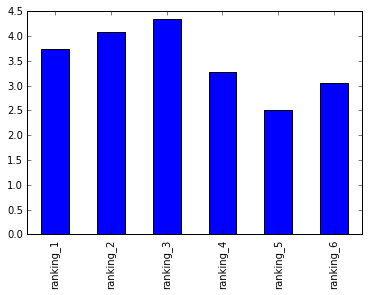

In [263]:
%matplotlib inline
import matplotlib.pyplot as plt
star_wars[star_wars.columns[9:15]].mean().plot(kind='bar')
plt.show()

### Star Wars: Episode V The Empire Strikes Back is best ranked and Star Wars: Episode III Revenge of the Sith is the least fav

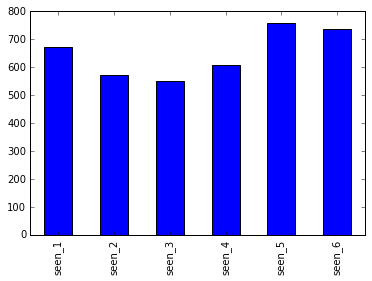

In [265]:
star_wars[star_wars.columns[3:9]].sum().plot(kind='bar')

###Star Wars: Episode V The Empire Strikes Back is most watched and Star Wars: Episode III Revenge of the Sith is the least watched accordingly

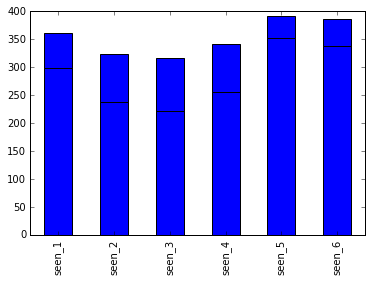

In [267]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
males[males.columns[3:9]].sum().plot(kind='bar')


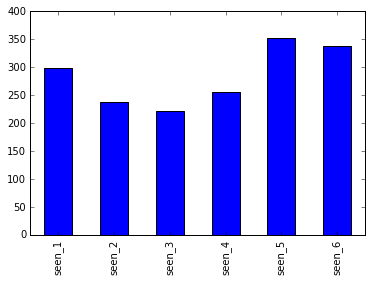

In [268]:
females[females.columns[3:9]].sum().plot(kind='bar')

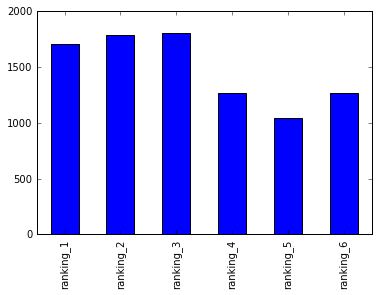

In [269]:
males[males.columns[9:15]].sum().plot(kind='bar')

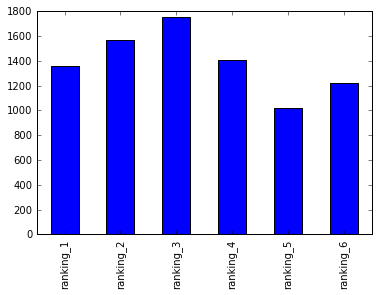

In [270]:
females[females.columns[9:15]].sum().plot(kind='bar')

In [276]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] ==True]
nonfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] ==False]

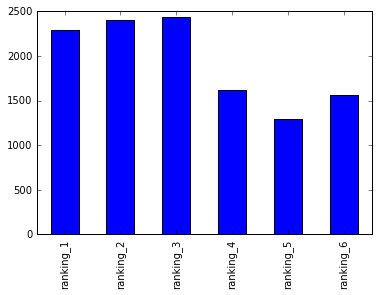

In [279]:
fans[fans.columns[9:15]].sum().plot(kind='bar')

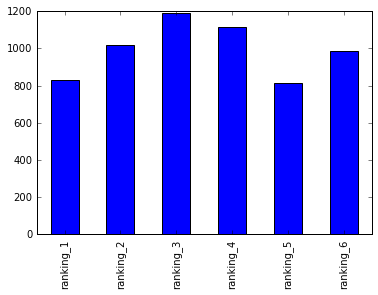

In [280]:
nonfans[nonfans.columns[9:15]].sum().plot(kind='bar')

### Non fans boys of star wars ranked the first movie higher